In [25]:
from google.colab import drive
drive.mount('/content/drive')
# on Google drive
filepath = "/content/drive/My Drive/Colab Notebooks/coursera/data/coursea_data.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# on kaggle
import numpy as np #
import pandas as pd #

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = (os.path.join(dirname, filename))

In [0]:
#on local 
filepath = '../drivedata/coursea_data.csv'

In [0]:
df = pd.read_csv(filepath, index_col=0)

## Items
- course_title : Contains the course title.
- course_organization : It tells which organization is conducting the courses.
- courseCertificatetype : It has details about what are the different certifications available in courses.
- course_rating : It has the ratings associated with each course.
- course_difficulty : It tells about how difficult or what is the level of the course.
- coursestudentsenrolled : It has the number of students that are enrolled in the course.

## Check roughly

In [0]:
from collections import defaultdict
dct_convert_unit = defaultdict(lambda:0)
dct_convert_unit['k']  = 1000
dct_convert_unit['m']  = 1000*1000

df['course_students_enrolled_unit'] = df['course_students_enrolled'].str[-1].apply(lambda x : dct_convert_unit[x])
df['course_students_enrolled'] = df['course_students_enrolled'].str[:-1].astype(float)
df['course_students_enrolled'] = df['course_students_enrolled'] * df['course_students_enrolled_unit'] 
del df['course_students_enrolled_unit'] 

In [0]:
ls_course_Certificate_type = ['COURSE','SPECIALIZATION' ,'PROFESSIONAL CERTIFICATE']
ls_course_difficulty = [ 'Beginner', 'Intermediate', 'Advanced','Mixed']

In [125]:
df.shape[0]

891

In [32]:
for _col  in df.columns:
    if df[_col].dtype == 'object':  
        display(pd.DataFrame(df[_col].value_counts()))

,course_title
Marketing Digital,2
Developing Your Musicianship,2
Machine Learning,2
Virtual Teacher,1
Data Visualization with Tableau,1
...,...
Russian for beginners А1. Русский язык: A1,1
Achieving Personal and Professional Success,1
Positive Psychology,1
Patrocinio Deportivo,1


,course_organization
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Johns Hopkins University,28
Duke University,28
...,...
National Taiwan University,1
National Arts Strategies,1
Peter the Great St. Petersburg Polytechnic University,1
MathWorks,1


,course_Certificate_type
COURSE,582
SPECIALIZATION,297
PROFESSIONAL CERTIFICATE,12


,course_difficulty
Beginner,487
Intermediate,198
Mixed,187
Advanced,19


In [33]:
for _col  in df.columns:
    if df[_col].dtype == 'object':  
        display(pd.DataFrame(df[_col].value_counts(normalize=True)*100).cumsum())

,course_title
Marketing Digital,0.224467
Developing Your Musicianship,0.448934
Machine Learning,0.673401
Virtual Teacher,0.785634
Data Visualization with Tableau,0.897868
...,...
Russian for beginners А1. Русский язык: A1,99.551066
Achieving Personal and Professional Success,99.663300
Positive Psychology,99.775533
Patrocinio Deportivo,99.887767


,course_organization
University of Pennsylvania,6.621773
University of Michigan,11.223345
Google Cloud,15.039282
Johns Hopkins University,18.181818
Duke University,21.324355
...,...
National Taiwan University,99.551066
National Arts Strategies,99.663300
Peter the Great St. Petersburg Polytechnic University,99.775533
MathWorks,99.887767


,course_Certificate_type
COURSE,65.319865
SPECIALIZATION,98.653199
PROFESSIONAL CERTIFICATE,100.000000


,course_difficulty
Beginner,54.657688
Intermediate,76.879910
Mixed,97.867565
Advanced,100.000000


In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
df.sort_values(by="course_students_enrolled",ascending=True)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0
462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1600.0
373,Healthcare Law,University of Pennsylvania,SPECIALIZATION,4.7,Intermediate,1700.0
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1700.0
...,...,...,...,...,...,...
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0


## Check categorical features


### certification type and difficulty
- Course > Sepcial >> Pro
  - Ex. 
      - Course : *Marchine Learning*
      - SP : *Deep Learning*
      - Pro : *IBM Data Science* 
  - <u>Maybe related to difficulty?</u>
- Certification type and difficulty are linked?
  - Heat map:
    - Heat map prove below.

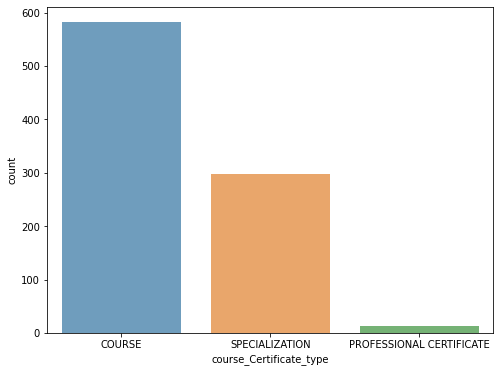

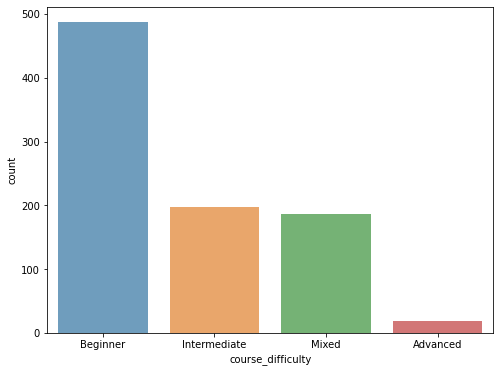

In [36]:
for _col  in ['course_Certificate_type','course_difficulty']:   
    fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
    sns.countplot(x=_col, data=df, ax= ax, order = df[_col].value_counts().index, alpha=0.7)

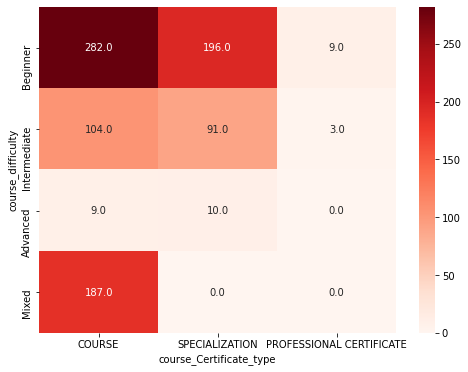

In [48]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
# sns.countplot(x='course_Certificate_typea', hue ='course_difficulty', order = ls_course_Certificate_type,hue_order=ls_course_difficulty,  data=df, ax= ax, alpha=0.7)
# ax.legend(loc='upper right')
df_pivot_cert_difficult = df[['course_Certificate_type', 'course_difficulty']] \
    .pivot_table(
        index='course_difficulty', columns='course_Certificate_type',
        aggfunc=len, fill_value=0)
  
df_pivot_cert_difficult = df_pivot_cert_difficult.loc[ls_course_difficulty,  ls_course_Certificate_type]d
sns.heatmap(df_pivot_cert_difficult, annot=True, fmt="1.1f",cmap="Reds")


### Rating distribute

- course_difficulty
  - Just by looking, difficulty related to rating. 
    - Ex. this course is soooo difficult! I hate this course... orz 
  - But mean and std in each difficulty are almost same.
    - it mean organizer set up course content cocommensurate with difficulty in many course
    - 0.1 of distance is large different???
- course_Certficate
  - Same as below
    - But a #Pro is very few. I cannot affirm this analysis


course_rating,3.3,3.7,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
course_difficulty,,,,,,,,,,,,,,
Advanced,0,0,0,0,0,1,1,2,5,0,5,4,1,0
Beginner,0,0,0,0,1,4,10,16,40,107,141,129,38,1
Intermediate,0,1,2,2,0,2,2,13,25,32,60,46,12,1
Mixed,1,0,0,0,0,3,2,3,10,29,45,77,17,0


,mean,std
course_difficulty,,
Advanced,4.600000,0.194365
Beginner,4.680903,0.141947
Intermediate,4.646465,0.188939
Mixed,4.708556,0.170803


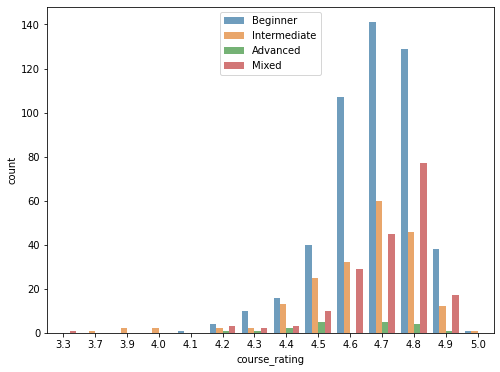

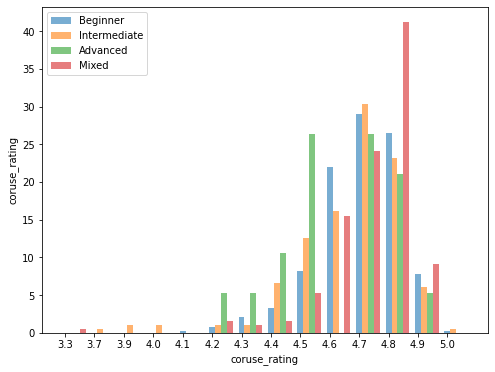

In [60]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.countplot(x='course_rating', data=df, ax= ax,hue = 'course_difficulty', order = sorted(list(set(df.course_rating))), hue_order=ls_course_difficulty, alpha=0.7)
ax.legend()
df_rating_dist =  df[['course_rating', 'course_difficulty']] \
    .pivot_table(
        columns='course_difficulty', index='course_rating',
        aggfunc=len, fill_value=0)

display(df_rating_dist.T)


df_rating_dist = 100*df_rating_dist/df_rating_dist.sum()
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
ls_xticklabel = list(df_rating_dist.index)
for i , _col in enumerate(ls_course_difficulty):
    ax.bar(
        list(map(lambda x: (0.2)*i+x, range(len((ls_xticklabel))))), 
        height=df_rating_dist[_col].values,
        label=_col,
        alpha=0.6, width=0.2)
ax.set_xticks(range(len((ls_xticklabel))))
ax.set_xticklabels(ls_xticklabel)
plt.xlabel('coruse_rating')
plt.ylabel('coruse_rating')
ax.legend()

df_rating_dist =  df[['course_rating', 'course_difficulty']] \
  .groupby('course_difficulty')['course_rating'].agg(["mean","std"])
display(df_rating_dist)

course_rating,3.3,3.7,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
course_Certificate_type,,,,,,,,,,,,,,
COURSE,1,0,0,2,0,6,5,13,38,92,162,201,61,1
PROFESSIONAL CERTIFICATE,0,0,0,0,0,0,0,0,0,6,2,2,2,0
SPECIALIZATION,0,1,2,0,1,4,10,21,42,70,87,53,5,1


,mean,std
course_Certificate_type,,
COURSE,4.707045,0.151647
PROFESSIONAL CERTIFICATE,4.700000,0.120605
SPECIALIZATION,4.618182,0.167874


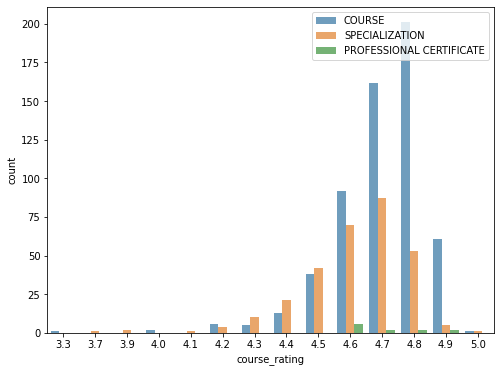

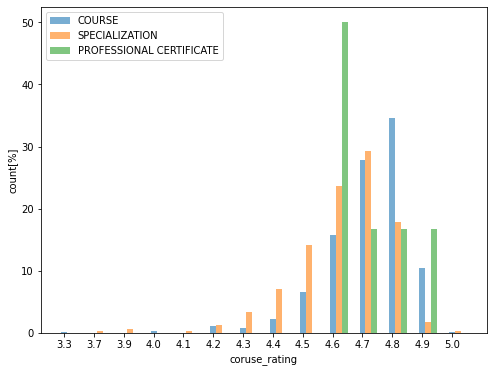

In [114]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.countplot(x='course_rating', data=df, ax= ax,hue = 'course_Certificate_type', order = sorted(list(set(df.course_rating))), hue_order=ls_course_Certificate_type, alpha=0.7)
ax.legend()
df_rating_dist =  df[['course_rating', 'course_Certificate_type']] \
    .pivot_table(
        columns='course_Certificate_type', index='course_rating',
        aggfunc=len, fill_value=0)

display(df_rating_dist.T)


df_rating_dist = 100*df_rating_dist/df_rating_dist.sum()
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
ls_xticklabel = list(df_rating_dist.index)
for i , _col in enumerate(ls_course_Certificate_type):
    ax.bar(
        list(map(lambda x: (0.2)*i+x, range(len((ls_xticklabel))))), 
        height=df_rating_dist[_col].values,
        label=_col,
        alpha=0.6, width=0.2)
ax.set_xticks(range(len((ls_xticklabel))))
ax.set_xticklabels(ls_xticklabel)
plt.xlabel('coruse_rating')
plt.ylabel('count[%]')
ax.legend()

df_rating_dist =  df[['course_rating', 'course_Certificate_type']] \
  .groupby('course_Certificate_type')['course_rating'].agg(["mean","std"])
display(df_rating_dist)


### course_students_enrolled
- course_students_enrolled distribution is long tail
  - convet log scale
- Break down analysis same as below
  - couse = SP < Pro
    - #Pro is few.　But Many pro course have many students when looking each data      
  - #student is not different between type of difficulty
  - But  I want to know "MIX", what is meaning of MIX?

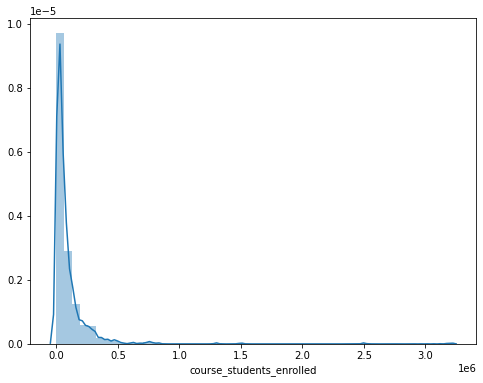

In [119]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
sns.distplot(df.loc[:, "course_students_enrolled"],ax=ax, label = _cert_type)

In [156]:
df_large = df[df.course_students_enrolled > 500000] \
  .sort_values(by="course_students_enrolled", ascending =False)
print(df_large.shape[0])
display(df_large)

214


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
...,...,...,...,...,...,...
64,Software Product Management,University of Alberta,SPECIALIZATION,4.6,Beginner,110000.0
194,Introduction to the Biology of Cancer,Johns Hopkins University,COURSE,4.8,Beginner,110000.0
277,Data Analysis with Python,IBM,COURSE,4.7,Beginner,110000.0
772,Sexualidad...mucho más que sexo,Universidad de los Andes,COURSE,4.8,Beginner,110000.0


In [124]:
df_small = df[df.course_students_enrolled < 10000]
print(df_small.shape[0])
display(df_small)

118


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400.0
283,AI for Medical Prognosis,deeplearning.ai,COURSE,4.6,Intermediate,4000.0
819,Aboriginal Worldviews and Education,University of Toronto,COURSE,4.7,Mixed,6600.0
612,Access Controls,(ISC)²,COURSE,4.6,Beginner,2900.0
...,...,...,...,...,...,...
865,Unity Certified Programmer Exam Preparation,Unity,SPECIALIZATION,4.5,Intermediate,6100.0
882,University Teaching,The University of Hong Kong,COURSE,4.8,Beginner,9500.0
638,Unraveling the Cycling City,University of Amsterdam,COURSE,4.9,Intermediate,3900.0
543,What is Compliance?,University of Pennsylvania,COURSE,4.8,Mixed,6200.0


In [0]:
import copy
df_logNStudent = copy.copy(df)
df_logNStudent.course_students_enrolled = np.log10(df_logNStudent.course_students_enrolled)

,mean,std,count,min,max
course_Certificate_type,,,,,
COURSE,4.630443,0.512007,582,3.176091,6.505150
PROFESSIONAL CERTIFICATE,5.000007,0.691166,12,3.414973,5.681241
SPECIALIZATION,4.580838,0.598373,297,3.204120,6.176091


,course_title,course_organization,course_students_enrolled
56,Arizona State University TESOL,Arizona State University,150000.0
9,Cloud Engineering with Google Cloud,Google Cloud,310000.0
22,Data Engineering with Google Cloud,Google Cloud,120000.0
25,Google IT Automation with Python,Google,93000.0
4,Google IT Support,Google,350000.0
34,IBM AI Engineering,IBM,140000.0
12,IBM Applied AI,IBM,220000.0
0,IBM Data Science,IBM,480000.0
160,SAS Programmer,SAS,370000.0
393,SAS Visual Business Analytics,SAS,2600.0


Text(0, 0.5, 'p')

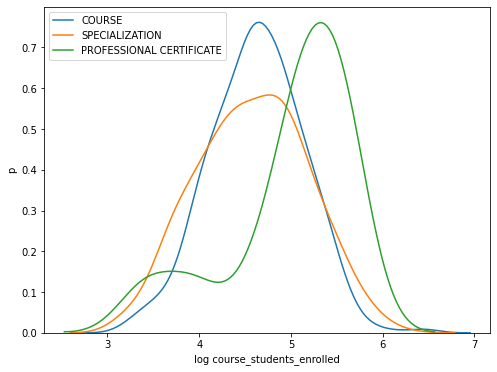

In [160]:
display(pd.DataFrame(df_logNStudent.groupby('course_Certificate_type')['course_students_enrolled'].agg(['mean','std','count','min','max'])))
display(df.loc[df.course_Certificate_type == "PROFESSIONAL CERTIFICATE", ["course_title","course_organization","course_students_enrolled"]])
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
for _cert_type in ls_course_Certificate_type:
  sns.kdeplot(df_logNStudent.loc[df.course_Certificate_type == _cert_type, "course_students_enrolled"],ax=ax, label = _cert_type)
# plt.xlim(-10000,500000)
plt.xlabel('log course_students_enrolled')
plt.ylabel('p')



,mean,std,count,min,max
course_difficulty,,,,,
Advanced,66547.368421,82262.211984,19,3500.0,320000.0
Beginner,81974.948665,127270.770733,487,1500.0,1500000.0
Intermediate,73264.141414,104206.139306,198,1600.0,690000.0
Mixed,133633.155080,318544.975762,187,2300.0,3200000.0


Text(0, 0.5, 'p')

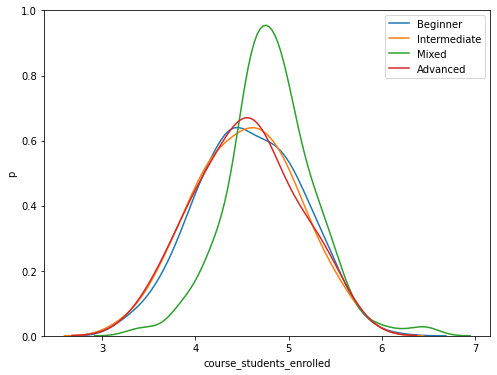

In [161]:
display(pd.DataFrame(df.groupby('course_difficulty')['course_students_enrolled'].agg(['mean','std','count','min','max'])))
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
for _diff in ['Beginner', 'Intermediate', 'Mixed', 'Advanced']:
  sns.kdeplot(df_logNStudent.loc[df.course_difficulty == _diff, "course_students_enrolled"],ax=ax, label = _diff)
# plt.xlim(-10000,500000)
plt.legend()
plt.xlabel('course_students_enrolled')
plt.ylabel('p')

### course_organization

In [165]:
!pip install gensim
!pip install -q wordcloud
import wordcloud
import nltk
import gensim
from gensim import corpora
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

In [0]:
import nltk
s = "Hi, I'm Taro Yamada I woke up at 8am"
morph = nltk.word_tokenize(s)

In [0]:
df_course_organization =  df.course_organization.apply(lambda x : nltk.word_tokenize(x))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

In [0]:

# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [188]:
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate([s]):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])


df_token_lists.head(5):
    0 1  2  3     4       5  6     7   8   9  10
0  hi    i  m  taro  yamada  i  woke  up  at  am


In [183]:
df_course_organization.values[0]

['(', 'ISC', ')', '²']

In [189]:
df_token_lists

,0,1,2,3,4,5,6,7,8,9,10
0,hi,,i,m,taro,yamada,i,woke,up,at,am
